#VAR & VARMAX

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
parser = lambda x:pd.datetime.strptime(x, '%d-%b-%y' )
df = pd.read_csv("Agmarknet_Price_And_Arrival_Report_LKNW_20Yrs_new.csv", parse_dates=['date_arrival'],date_parser= parser)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,state_name,district_name,market_center_name,Variety,group_name,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
0,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1620,1720,1670,2022-08-20
1,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1640,1740,1690,2022-08-19
2,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1640,1740,1690,2022-08-18
3,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,90.0,1640,1740,1690,2022-08-17
4,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1610,1710,1660,2022-08-16
...,...,...,...,...,...,...,...,...,...,...
5667,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,360.0,0,545,160,2002-08-13
5668,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,540,150,2002-08-12
5669,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,555,160,2002-08-12
5670,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,530,150,2002-08-09


In [ ]:
# ## Sorting index to ascending order of date_arrival Col
df= df.iloc[::-1]
df

,state_name,district_name,market_center_name,Variety,group_name,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
5671,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,545,160,2002-08-09
5670,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,530,150,2002-08-09
5669,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,555,160,2002-08-12
5668,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,540,150,2002-08-12
5667,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,360.0,0,545,160,2002-08-13
...,...,...,...,...,...,...,...,...,...,...
4,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1610,1710,1660,2022-08-16
3,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,90.0,1640,1740,1690,2022-08-17
2,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1640,1740,1690,2022-08-18
1,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1640,1740,1690,2022-08-19


In [ ]:
df.describe()

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q)
count,5672.000000,5672.000000,5672.000000,5672.000000
mean,147.935684,782.160790,884.795663,841.607017
std,137.014209,442.619018,518.273961,488.959581
min,3.500000,186.000000,150.000000,0.000000
25%,63.500000,500.000000,520.000000,500.000000
50%,103.000000,500.000000,745.000000,715.000000
75%,181.125000,1000.000000,1150.000000,1071.250000
max,1745.000000,3200.000000,4800.000000,4800.000000


In [ ]:
df['MODAL(Per Q)'].isna().sum()

0

In [ ]:
df.value_counts('MIN'),df.value_counts('MAX'),df.value_counts('MODAL(Per Q)')

(MIN
 0       2347
 1000     293
 500      210
 800      210
 600      205
         ... 
 1580       1
 520        1
 1625       1
 1675       1
 1110       1
 Length: 182, dtype: int64, MAX
 600     282
 700     210
 1200    205
 650     203
 1100    200
        ... 
 175       1
 1590      1
 1110      1
 170       1
 4800      1
 Length: 275, dtype: int64, MODAL(Per Q)
 500     202
 400     199
 600     196
 1100    186
 700     167
        ... 
 1760      1
 1720      1
 1540      1
 1535      1
 4800      1
 Length: 324, dtype: int64)

In [ ]:
df.isnull().sum()

state_name            0
district_name         0
market_center_name    0
Variety               0
group_name            0
Arrival(Tonnes)       0
MIN                   0
MAX                   0
MODAL(Per Q)          0
date_arrival          0
dtype: int64

In [ ]:
df['MIN']=np.where(df['MIN']==0,df['MIN'].median(),df['MIN'])
df['MIN']

5671     500.0
5670     500.0
5669     500.0
5668     500.0
5667     500.0
         ...  
4       1610.0
3       1640.0
2       1640.0
1       1640.0
0       1620.0
Name: MIN, Length: 5672, dtype: float64

In [ ]:
df['MAX']=np.where(df['MAX']==0,df['MAX'].median(),df['MAX'])
df['MAX']

5671     545.0
5670     530.0
5669     555.0
5668     540.0
5667     545.0
         ...  
4       1710.0
3       1740.0
2       1740.0
1       1740.0
0       1720.0
Name: MAX, Length: 5672, dtype: float64

In [ ]:
import plotly.express as px
fig = px.line(df, x='date_arrival', y='MODAL(Per Q)', title='MODAL price/Quintal_slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector = dict(
        buttons= list([
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(count=2, label='5Y', step='year', stepmode='backward'),
            dict(count=3, label='10Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
#Should not be applied here
# df['Arrival']=np.where(df['Arrival']==0,df['Arrival'].median(),df['Arrival'])
# df['Arrival']

In [ ]:
import plotly.express as px
fig = px.line(df, x='date_arrival', y='Arrival(Tonnes)', title='Arrival(Tonnes)_ slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector = dict(
        buttons= list([
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(count=2, label='5Y', step='year', stepmode='backward'),
            dict(count=3, label='10Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
df = df.set_index('date_arrival')
df

In [ ]:
parser1 = lambda x:pd.datetime.strptime(x, '%d/%m/%Y' )
df1 = pd.read_csv("LCKNW_Prcp_Temp_20yrs.csv", parse_dates=['date_arrival'],date_parser= parser1)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,date_arrival,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,2002-08-09,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,372.0,",,S",274.0,",,S",322,"H,,S"
1,2002-08-10,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,372.0,",,S",NaN,NaN,284,"H,,S"
2,2002-08-11,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,332.0,",,S",255.0,",,S",277,"H,,S"
3,2002-08-12,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,288.0,",,S",NaN,NaN,268,"H,,S"
4,2002-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",249.0,",,S",320.0,",,S",246.0,",,S",268,"H,,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2022-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,360.0,",,S",NaN,NaN,309,"H,,S"
7297,2022-08-14,26.75,80.883,128,"LUCKNOW AMAUSI, IN",150.0,",,S",360.0,",,S",265.0,",,S",301,"H,,S"
7298,2022-08-15,26.75,80.883,128,"LUCKNOW AMAUSI, IN",5.0,",,S",342.0,",,S",NaN,NaN,281,"H,,S"
7299,2022-08-16,26.75,80.883,128,"LUCKNOW AMAUSI, IN",41.0,",,S",336.0,",,S",256.0,",,S",287,"H,,S"


In [ ]:
df1.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TMAX,TMIN,TAVG
count,7301.00,7.301000e+03,7301.0,2572.000000,5557.000000,5817.000000,7301.00000
mean,26.75,8.088300e+01,128.0,64.491835,322.459061,185.801444,252.61293
std,0.00,1.421183e-14,0.0,177.066134,63.480617,71.913840,67.34759
min,26.75,8.088300e+01,128.0,0.000000,110.000000,-7.000000,56.00000
25%,26.75,8.088300e+01,128.0,0.000000,280.000000,122.000000,196.00000
50%,26.75,8.088300e+01,128.0,0.000000,332.000000,204.000000,273.00000
75%,26.75,8.088300e+01,128.0,41.000000,364.000000,250.000000,304.00000
max,26.75,8.088300e+01,128.0,3612.000000,461.000000,318.000000,389.00000


In [ ]:
df1['TAVG'].isna().sum()

0

In [ ]:
df1['TMAX'].isna().sum(), df1['TMIN'].isnull().sum()

(1744, 1484)

In [ ]:
df1['TMIN']=np.where(df1['TMIN']==0,df1['TMIN'].mean(),df1['TMIN'])
df1['TMIN']

0       274.0
1         NaN
2       255.0
3         NaN
4       246.0
        ...  
7296      NaN
7297    265.0
7298      NaN
7299    256.0
7300      NaN
Name: TMIN, Length: 7301, dtype: float64

In [ ]:
df1['TMIN']= df1['TMIN'].fillna(method='ffill')  #,inplace =True
df1['TMIN']

0       274.0
1       274.0
2       255.0
3       255.0
4       246.0
        ...  
7296    269.0
7297    265.0
7298    265.0
7299    256.0
7300    256.0
Name: TMIN, Length: 7301, dtype: float64

In [ ]:
df1['TMAX']=np.where(df1['TMAX']==0,df1['TMAX'].mean(),df1['TMAX'])
df1['TMAX']

0       372.0
1       372.0
2       332.0
3       288.0
4       320.0
        ...  
7296    360.0
7297    360.0
7298    342.0
7299    336.0
7300    350.0
Name: TMAX, Length: 7301, dtype: float64

In [ ]:
df1['TMAX']= df1['TMAX'].fillna(value=df1['TMAX'].mean()) 

df1['TMAX']

0       372.0
1       372.0
2       332.0
3       288.0
4       320.0
        ...  
7296    360.0
7297    360.0
7298    342.0
7299    336.0
7300    350.0
Name: TMAX, Length: 7301, dtype: float64

In [ ]:
df1['TMAX'].isna().sum(), df1['TMIN'].isna().sum()

(0, 0)

In [ ]:
import plotly.express as px
fig = px.line(df1, x='date_arrival', y='TAVG', title='Avg_Temperature(one tenth of a degree)_slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector = dict(
        buttons= list([
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(count=2, label='5Y', step='year', stepmode='backward'),
            dict(count=3, label='10Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
## precipitation: fillna() with 0
df1['PRCP'].fillna(0,axis=0,inplace=True)
df1

,date_arrival,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,2002-08-09,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,372.0,",,S",274.0,",,S",322,"H,,S"
1,2002-08-10,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,372.0,",,S",274.0,NaN,284,"H,,S"
2,2002-08-11,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,332.0,",,S",255.0,",,S",277,"H,,S"
3,2002-08-12,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,288.0,",,S",255.0,NaN,268,"H,,S"
4,2002-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",249.0,",,S",320.0,",,S",246.0,",,S",268,"H,,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2022-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,360.0,",,S",269.0,NaN,309,"H,,S"
7297,2022-08-14,26.75,80.883,128,"LUCKNOW AMAUSI, IN",150.0,",,S",360.0,",,S",265.0,",,S",301,"H,,S"
7298,2022-08-15,26.75,80.883,128,"LUCKNOW AMAUSI, IN",5.0,",,S",342.0,",,S",265.0,NaN,281,"H,,S"
7299,2022-08-16,26.75,80.883,128,"LUCKNOW AMAUSI, IN",41.0,",,S",336.0,",,S",256.0,",,S",287,"H,,S"


In [ ]:
# Should drop repetitive cols datapoints that are not required but will keep in Dataset where I 
# have data from multiple State and Markets

df.drop(columns=['state_name','district_name','market_center_name','group_name'],axis=1,  inplace=True)
df

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q)
date_arrival,,,,,
2002-08-09,Local,340.0,500.0,545.0,160
2002-08-09,Red,340.0,500.0,530.0,150
2002-08-12,Local,340.0,500.0,555.0,160
2002-08-12,Red,340.0,500.0,540.0,150
2002-08-13,Local,360.0,500.0,545.0,160
...,...,...,...,...,...
2022-08-16,Desi,110.0,1610.0,1710.0,1660
2022-08-17,Desi,90.0,1640.0,1740.0,1690
2022-08-18,Desi,110.0,1640.0,1740.0,1690


In [ ]:
df1.drop(columns=['LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME',
       'PRCP_ATTRIBUTES', 'TMAX_ATTRIBUTES','TMIN_ATTRIBUTES',
       'TAVG_ATTRIBUTES'],axis=1,  inplace=True)
df1

,date_arrival,PRCP,TMAX,TMIN,TAVG
0,2002-08-09,0.0,372.0,274.0,322
1,2002-08-10,0.0,372.0,274.0,284
2,2002-08-11,0.0,332.0,255.0,277
3,2002-08-12,0.0,288.0,255.0,268
4,2002-08-13,249.0,320.0,246.0,268
...,...,...,...,...,...
7296,2022-08-13,0.0,360.0,269.0,309
7297,2022-08-14,150.0,360.0,265.0,301
7298,2022-08-15,5.0,342.0,265.0,281
7299,2022-08-16,41.0,336.0,256.0,287


In [ ]:
import plotly.express as px
fig = px.line(df1, x='date_arrival', y='PRCP', title='Precipitation/Rainfall in mm_slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector = dict(
        buttons= list([
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(count=2, label='5Y', step='year', stepmode='backward'),
            dict(count=3, label='10Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
# Merging both dataframes according to df1 col date_arrival
# Left Join

df2 = pd.merge(df, df1, on= 'date_arrival')
df2

,date_arrival,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
0,2002-08-09,Local,340.0,500.0,545.0,160,0.0,372.0,274.0,322
1,2002-08-09,Red,340.0,500.0,530.0,150,0.0,372.0,274.0,322
2,2002-08-12,Local,340.0,500.0,555.0,160,0.0,288.0,255.0,268
3,2002-08-12,Red,340.0,500.0,540.0,150,0.0,288.0,255.0,268
4,2002-08-13,Local,360.0,500.0,545.0,160,249.0,320.0,246.0,268
...,...,...,...,...,...,...,...,...,...,...
5655,2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
5656,2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
5657,2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301
5658,2022-08-16,Desi,110.0,1610.0,1710.0,1660,41.0,336.0,256.0,287


In [ ]:
df2.isna().sum(), df2.isnull().sum()

(date_arrival       0
 Variety            0
 Arrival(Tonnes)    0
 MIN                0
 MAX                0
 MODAL(Per Q)       0
 PRCP               0
 TMAX               0
 TMIN               0
 TAVG               0
 dtype: int64, date_arrival       0
 Variety            0
 Arrival(Tonnes)    0
 MIN                0
 MAX                0
 MODAL(Per Q)       0
 PRCP               0
 TMAX               0
 TMIN               0
 TAVG               0
 dtype: int64)

Plots w.r.t Date_arrival

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18d3db2990>,
      dtype=object)

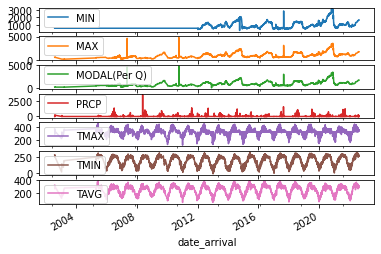

In [ ]:
df2.set_index('date_arrival')[['MIN','MAX','MODAL(Per Q)','PRCP','TMAX','TMIN','TAVG']].plot(subplots=True)

Pearson Correlation Check

In [ ]:
df2.corr(method='pearson')

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
Arrival(Tonnes),1.000000,-0.040156,-0.065415,-0.087633,-0.055427,-0.257852,-0.332064,-0.308101
MIN,-0.040156,1.000000,0.936636,0.934336,0.041958,0.087153,0.194229,0.164760
MAX,-0.065415,0.936636,1.000000,0.995024,0.046484,0.118719,0.240000,0.202191
MODAL(Per Q),-0.087633,0.934336,0.995024,1.000000,0.044672,0.128168,0.247920,0.209461
PRCP,-0.055427,0.041958,0.046484,0.044672,1.000000,0.002527,0.118661,0.051706
TMAX,-0.257852,0.087153,0.118719,0.128168,0.002527,1.000000,0.730081,0.812158
TMIN,-0.332064,0.194229,0.240000,0.247920,0.118661,0.730081,1.000000,0.933325
TAVG,-0.308101,0.164760,0.202191,0.209461,0.051706,0.812158,0.933325,1.000000


In [ ]:
# another correlation test
df2.corr(method='spearman')

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
Arrival(Tonnes),1.000000,0.212039,0.065783,0.027954,-0.121645,-0.267554,-0.328654,-0.279931
MIN,0.212039,1.000000,0.853623,0.846873,0.073693,0.075932,0.202829,0.189286
MAX,0.065783,0.853623,1.000000,0.990944,0.083318,0.124500,0.273635,0.235056
MODAL(Per Q),0.027954,0.846873,0.990944,1.000000,0.086549,0.145472,0.293834,0.255539
PRCP,-0.121645,0.073693,0.083318,0.086549,1.000000,0.031737,0.213582,0.067937
TMAX,-0.267554,0.075932,0.124500,0.145472,0.031737,1.000000,0.699988,0.766073
TMIN,-0.328654,0.202829,0.273635,0.293834,0.213582,0.699988,1.000000,0.892312
TAVG,-0.279931,0.189286,0.235056,0.255539,0.067937,0.766073,0.892312,1.000000


ADF test(Stationarity) and Granger Causality Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

Null hypothesis: Time series has a Unit root and is not Stationary

Alternate Hypothesis: Series is Stationary

In [ ]:
result = adfuller(df2['MODAL(Per Q)'])
print(f'Test_statistics : {result[0]}')
print(f'P_value : {result[1]}')
print(f'Critical_values : {result[4]}')


if result[1] > 0.05 :
     print('Series is not Stationary')
else:
    print('MODAL:This Series is Stationary')

Test_statistics : -4.305078373987848
P_value : 0.0004353028457140614
Critical_values : {'1%': -3.4315101842998676, '5%': -2.862052688792611, '10%': -2.5670429026667794}
MODAL:This Series is Stationary


In [ ]:
result = adfuller(df2['PRCP'])
print(f'Test_statistics : {result[0]}')
print(f'P_value : {result[1]}')
print(f'Critical_values : {result[4]}')


if result[1] > 0.05 :
     print('Series is not Stationary')
else:
    print('PRCP:This Series is Stationary')

Test_statistics : -12.631059476651492
P_value : 1.5045217778866288e-23
Critical_values : {'1%': -3.431509567118304, '5%': -2.862052416111477, '10%': -2.567042757510297}
PRCP:This Series is Stationary


In [ ]:
result = adfuller(df2['Arrival(Tonnes)'])
print(f'Test_statistics : {result[0]}')
print(f'P_value : {result[1]}')
print(f'Critical_values : {result[4]}')


if result[1] > 0.05 :
     print('Series is not Stationary')
else:
    print('Arrival:This Series is Stationary')

Test_statistics : -5.310654221754431
P_value : 5.204152858956954e-06
Critical_values : {'1%': -3.431509567118304, '5%': -2.862052416111477, '10%': -2.567042757510297}
Arrival:This Series is Stationary


In [ ]:
result = adfuller(df2['TAVG'])
print(f'Test_statistics : {result[0]}')
print(f'P_value : {result[1]}')
print(f'Critical_values : {result[4]}')


if result[1] > 0.05 :
     print('Series is not Stationary')
else:
    print('TAVG: This Series is Stationary')

Test_statistics : -7.027578336475181
P_value : 6.306115401663878e-10
Critical_values : {'1%': -3.431512659610059, '5%': -2.8620537824254733, '10%': -2.5670434848409958}
TAVG: This Series is Stationary


Null Hyp :Xt doesn't Granger Causes Yt


Alternate Hyp: Xt Granger Causes Yt(lag values of Xt can help predicting Yt future values)

Note the changed lag values

In [ ]:
# Yt : Modal price of the commodity (target variable)
# Xt : PRCP, Arrival(Tonnes), TAVG

In [ ]:
max_lags=7
results = grangercausalitytests(df2[['MODAL(Per Q)','TAVG']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
results

{1: ({'ssr_ftest': (15.78291147923994, 7.192437324072446e-05, 5656.0, 1),
   'ssr_chi2test': (15.791282896219737, 7.072762108392976e-05, 1),
   'lrtest': (15.769291229182272, 7.15545486357823e-05, 1),
   'params_ftest': (15.782911479162317, 7.192437324370287e-05, 5656.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (10.075556820249227, 4.285700989085067e-05, 5653.0, 2),
   'ssr_chi2test': (20.168937020686403, 4.1722562416308036e-05, 2),
   'lrtest': (20.133074358018348, 4.2477451362327085e-05, 2),
   'params_ftest': (10.075556820250448, 4.285700989080271e-05, 5653.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (8.942949023438723, 6.5858164833625e-06, 5650.0, 3),
   'ssr_chi2test': (26.862086349872314, 6.292604366509088e-06, 3),
   'lrtest': (26.798510643056943, 6.48867187011445e-06, 3),
   'params_ftest': (8.942949023438443, 6.5858164833658575e-06, 5650.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

In [ ]:
#lag=?
P_values =[round(results[i+1][0]['ssr_ftest'][1],7) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[7.19e-05, 4.29e-05, 6.6e-06, 3e-07, 1e-07, 0.0, 0.0]


Similarly on other series of values

In [ ]:
max_lags=7
results = grangercausalitytests(df2[['PRCP','TAVG']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],7) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[0.000289, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
max_lags=7
results = grangercausalitytests(df2[['PRCP','TMAX']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],7) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[0.0738635, 0.0150098, 0.0072789, 0.0027134, 0.0011738, 0.0021473, 0.0028642]


In [ ]:
max_lags=7  # lag=2
results = grangercausalitytests(df2[['MODAL(Per Q)','TMAX']].dropna(),max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],7) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[0.0020629, 0.0009221, 0.0002157, 2.77e-05, 1.16e-05, 4.9e-06, 6.9e-06]


In [ ]:
max_lags=15   # lag=1 & lag=15  #TAVG g.Causes ARRIVAL series
results = grangercausalitytests(df2[['Arrival(Tonnes)','TAVG']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],15) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[5.6481872e-08, 4.610584363e-06, 2.6969695554e-05, 3.9849367188e-05, 6.1704576334e-05, 0.000147703302045, 0.000231514263381, 0.000471493406143, 0.000250535419889, 0.000521861205215, 0.000884585910086, 0.001092956390392, 0.0020059816444, 0.002209839240777, 0.002336485746895]


In [ ]:
max_lags=15    ## lag=3
results = grangercausalitytests(df2[['MODAL(Per Q)','Arrival(Tonnes)']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],7) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[0.3983377, 0.0633438, 0.0045132, 0.0004327, 0.0003467, 0.0002828, 0.0002279, 6.67e-05, 0.0002008, 0.0003374, 0.0007969, 0.0015104, 0.0028971, 0.0050255, 0.0084603]


Precipitation doesnt Granger Causes Modal price  

In [ ]:
max_lags=15   # PRCP G.Causes Modal price series
results = grangercausalitytests(df2[['MODAL(Per Q)','PRCP']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],15) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[0.315689286189544, 0.592265445038586, 6.47716287e-06, 4.438987972e-06, 4.487339984e-06, 6.546180561e-06, 1.2030098655e-05, 2.7993028373e-05, 5.6567059954e-05, 0.000112654652193, 0.000186026633008, 0.000322473305063, 0.000573995207157, 0.001026627174911, 0.001377969691481]


But conversely Modal price Granger Causes  Precipitation

In [ ]:
max_lags=15   # MODAL does G.Causes PRCP # maybe not significantly
results = grangercausalitytests(df2[['PRCP','MODAL(Per Q)']],max_lags,verbose=False)   #Runs T-test /Chi_Sq/ F-Test on lagged variabales of Xt
P_values =[round(results[i+1][0]['ssr_ftest'][1],15) for i in range(max_lags)]
print('P_Values / lag :'+str(P_values))

P_Values / lag :[0.00978095424281, 0.059661128241156, 0.160588753603597, 0.331739591199554, 0.487443132820786, 0.586507101152054, 0.730807377923711, 0.832417712011247, 0.92197667777126, 0.952559178837066, 0.978456601456482, 0.993735882338909, 0.992958729165012, 0.995830424956497, 0.998217894518088]


In [ ]:
df2

,date_arrival,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
0,2002-08-09,Local,340.0,500.0,545.0,160,0.0,372.0,274.0,322
1,2002-08-09,Red,340.0,500.0,530.0,150,0.0,372.0,274.0,322
2,2002-08-12,Local,340.0,500.0,555.0,160,0.0,288.0,255.0,268
3,2002-08-12,Red,340.0,500.0,540.0,150,0.0,288.0,255.0,268
4,2002-08-13,Local,360.0,500.0,545.0,160,249.0,320.0,246.0,268
...,...,...,...,...,...,...,...,...,...,...
5655,2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
5656,2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
5657,2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301
5658,2022-08-16,Desi,110.0,1610.0,1710.0,1660,41.0,336.0,256.0,287


In [ ]:
df2.set_index('date_arrival',inplace=True)
df2

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
date_arrival,,,,,,,,,
2002-08-09,Local,340.0,500.0,545.0,160,0.0,372.0,274.0,322
2002-08-09,Red,340.0,500.0,530.0,150,0.0,372.0,274.0,322
2002-08-12,Local,340.0,500.0,555.0,160,0.0,288.0,255.0,268
2002-08-12,Red,340.0,500.0,540.0,150,0.0,288.0,255.0,268
2002-08-13,Local,360.0,500.0,545.0,160,249.0,320.0,246.0,268
...,...,...,...,...,...,...,...,...,...
2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301


Granger causality test : alltogether fn.

In [ ]:
df_input = df2[['MODAL(Per Q)','MAX','TAVG','Arrival(Tonnes)','PRCP']]
df_input

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP
date_arrival,,,,,
2002-08-09,160,545.0,322,340.0,0.0
2002-08-09,150,530.0,322,340.0,0.0
2002-08-12,160,555.0,268,340.0,0.0
2002-08-12,150,540.0,268,340.0,0.0
2002-08-13,160,545.0,268,360.0,249.0
...,...,...,...,...,...
2022-08-12,1670,1730.0,293,110.0,0.0
2022-08-13,1660,1710.0,309,100.0,0.0
2022-08-14,1660,1710.0,301,70.0,150.0


In [ ]:
df_input.isna().sum(), df_input.isnull().sum()

(MODAL(Per Q)       0
 MAX                0
 TAVG               0
 Arrival(Tonnes)    0
 PRCP               0
 dtype: int64, MODAL(Per Q)       0
 MAX                0
 TAVG               0
 Arrival(Tonnes)    0
 PRCP               0
 dtype: int64)

In [ ]:
# df_input= df_input.asfreq('B')

Test_Train split

In [ ]:
df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [ ]:
df_train.isnull().sum()

MODAL(Per Q)       0
MAX                0
TAVG               0
Arrival(Tonnes)    0
PRCP               0
dtype: int64

In [ ]:
df_train.shape, df_test.shape

((5094, 5), (566, 5))

## 1. VAR

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
df_train.tail(10)

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP
date_arrival,,,,,
2020-11-21,3300,3400.0,171,60.0,0.0
2020-11-22,3300,3400.0,158,68.0,0.0
2020-11-23,3300,3400.0,163,85.0,0.0
2020-11-24,3475,3550.0,168,47.0,0.0
2020-11-26,3260,3350.0,184,104.0,0.0
2020-11-27,3150,3250.0,192,109.0,0.0
2020-11-28,3100,3200.0,184,125.0,0.0
2020-11-29,3000,3100.0,176,119.0,0.0
2020-12-01,3000,3100.0,171,100.0,0.0


In [ ]:
df_test.head()

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP
date_arrival,,,,,
2020-12-03,3000,3100.0,176,119.0,0.0
2020-12-04,2900,3000.0,177,120.0,0.0
2020-12-05,2200,2260.0,185,180.0,0.0
2020-12-06,2000,2100.0,196,200.0,0.0
2020-12-07,2200,2300.0,189,185.0,0.0


In [ ]:
df_train.isnull().sum()

MODAL(Per Q)       0
MAX                0
TAVG               0
Arrival(Tonnes)    0
PRCP               0
dtype: int64

In [ ]:
df_input.isnull().sum()

MODAL(Per Q)       0
MAX                0
TAVG               0
Arrival(Tonnes)    0
PRCP               0
dtype: int64

In [ ]:
df_train

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP
date_arrival,,,,,
2002-08-09,160,545.0,322,340.0,0.0
2002-08-09,150,530.0,322,340.0,0.0
2002-08-12,160,555.0,268,340.0,0.0
2002-08-12,150,540.0,268,340.0,0.0
2002-08-13,160,545.0,268,360.0,249.0
...,...,...,...,...,...
2020-11-27,3150,3250.0,192,109.0,0.0
2020-11-28,3100,3200.0,184,125.0,0.0
2020-11-29,3000,3100.0,176,119.0,0.0


In [ ]:
df_train.isnull().sum()

MODAL(Per Q)       0
MAX                0
TAVG               0
Arrival(Tonnes)    0
PRCP               0
dtype: int64

In [ ]:
model = VAR(df_train, freq=None)
for i in range(27):
  results = model.fit(i)
  # print('Lag Order=',i)
  print('Order:', i+1)
  print('AIC:', results.aic)  # Akaike information Criterian
  print('BIC:', results.bic)  # Bayesian Information Criterian

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Order: 1
AIC: 47.72314562836841
BIC: 47.729560841025986
Order: 2
AIC: 38.90340283355796
BIC: 38.941900510723976
Order: 3
AIC: 38.34549150293411
BIC: 38.4160823175025
Order: 4
AIC: 38.22123746119692
BIC: 38.3239320917827
Order: 5
AIC: 38.112937463850315
BIC: 38.24774659479377
Order: 6
AIC: 38.09457126372394
BIC: 38.26150558509485
Order: 7
AIC: 38.07707561937199
BIC: 38.27614582697382
Order: 8
AIC: 38.07198152858931
BIC: 38.30319832396342
Order: 9
AIC: 38.06307944880047
BIC: 38.32645353923035
Order: 10
AIC: 38.06391239718512
BIC: 38.359454495700554
Order: 11
AIC: 38.06980824561761
BIC: 38.39752907099898
Order: 12
AIC: 38.074131003163394
BIC: 38.43404127994583
Order: 13
AIC: 38.06656477422092
BIC: 38.458675232698575
Order: 14
AIC: 38.068847898540255
BIC: 38.493169274770516
Order: 15
AIC: 38.072866254401035
BIC: 38.52940929020876
Order: 16
AIC: 38.00226393864135
BIC: 38.49103938162313
Order: 17
AIC: 37.989050022260166
BIC: 38.510068625788556
Order: 18
AIC: 37.98566835085673
BIC: 38.5389408

Model selection: Lowest values at a Lag

In [ ]:
model.select_order(27).summary()

,AIC,BIC,FPE,HQIC
0,47.57,47.58,4.567e+20,47.57
1,38.84,38.88,7.415e+16,38.86
2,38.28,38.35,4.209e+16,38.30
3,38.15,38.26,3.714e+16,38.19
4,38.03,38.17*,3.298e+16,38.08
5,38.01,38.18,3.232e+16,38.07
6,37.99,38.19,3.162e+16,38.06*
7,37.99,38.22,3.148e+16,38.07
8,37.98*,38.24,3.112e+16*,38.07
9,37.98,38.27,3.115e+16,38.08


In [ ]:
model = VAR(df_train,freq=None)
results = model.fit(4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Sep, 2022
Time:                     07:04:42
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    38.2477
Nobs:                     5090.00    HQIC:                   38.1601
Log likelihood:          -133004.    FPE:                3.56647e+16
AIC:                      38.1129    Det(Omega_mle):     3.49380e+16
--------------------------------------------------------------------
Results for equation MODAL(Per Q)
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                    -14.991936         7.672430           -1.954           0.051
L1.MODAL(Per Q)            0.225510         0.058298            3.868           0.000
L1.MAX                     0.0882

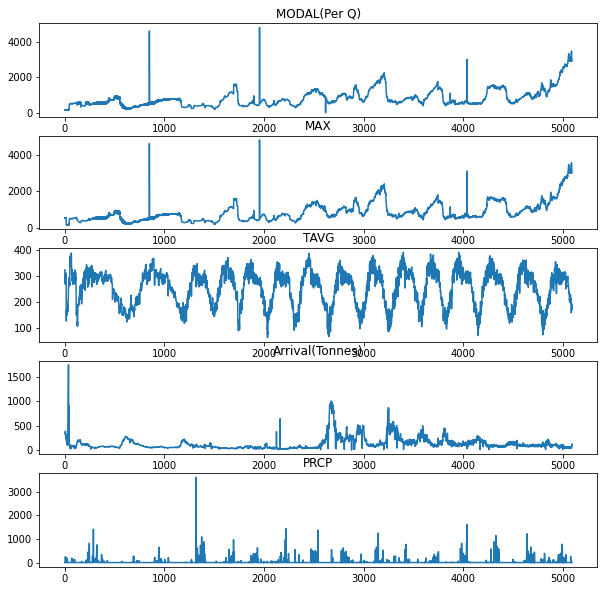

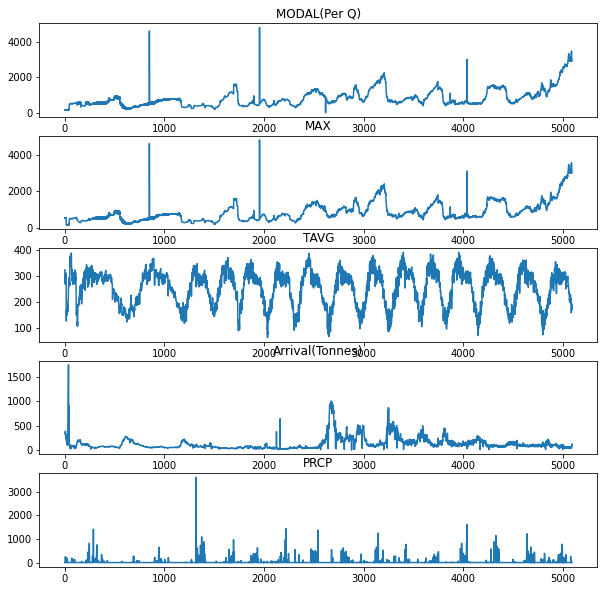

In [ ]:
results.plot()

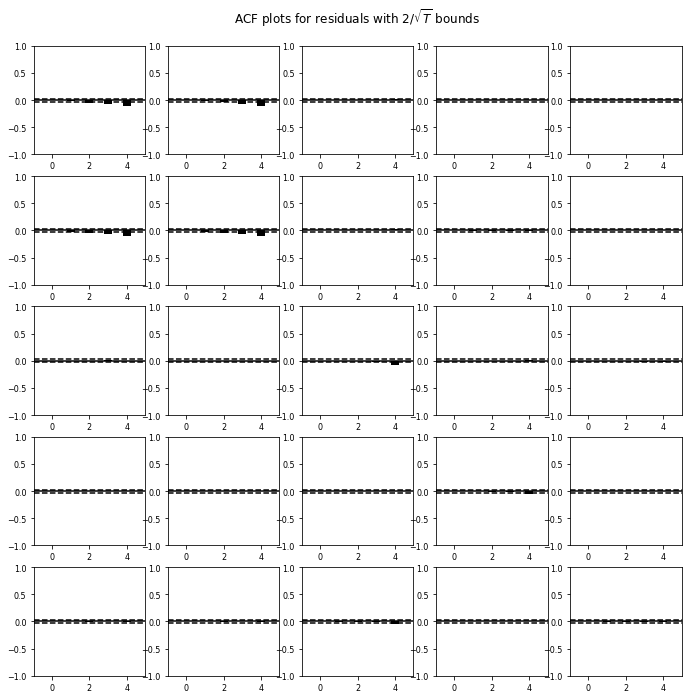

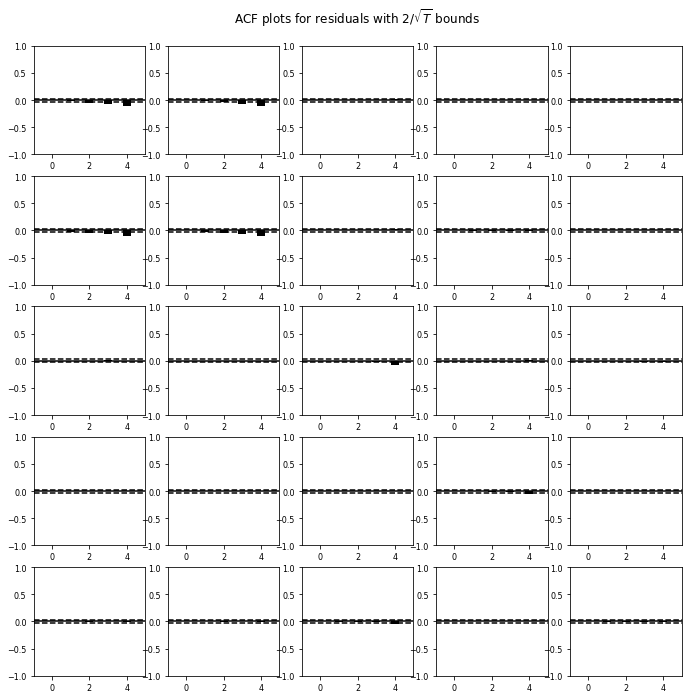

In [ ]:
results.plot_acorr(nlags=4)

In [ ]:
lag=results.k_ar

In [ ]:
lag

4

Looking at the values of past 4 lags we are forecasting future values

In [ ]:
prediction = []
steps =10
for i in range(steps):
    a = results.forecast(df_train.values[-lag:],steps=steps)[i][0]
    prediction.append(a)

pred = pd.DataFrame({'prediction':prediction})

In [ ]:
df_test[0:10]

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP
date_arrival,,,,,
2020-12-03,3000,3100.0,176,119.0,0.0
2020-12-04,2900,3000.0,177,120.0,0.0
2020-12-05,2200,2260.0,185,180.0,0.0
2020-12-06,2000,2100.0,196,200.0,0.0
2020-12-07,2200,2300.0,189,185.0,0.0
2020-12-08,2350,2500.0,186,150.0,0.0
2020-12-09,2360,2500.0,186,200.0,0.0
2020-12-10,2200,2300.0,179,190.0,0.0
2020-12-11,2000,2100.0,166,225.0,0.0


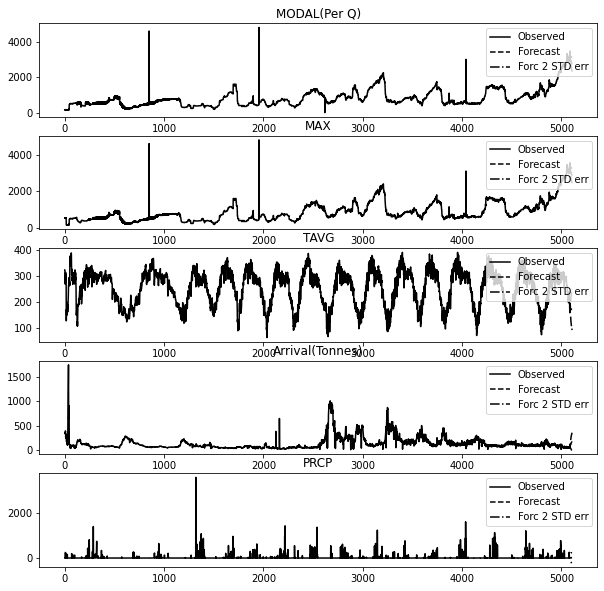

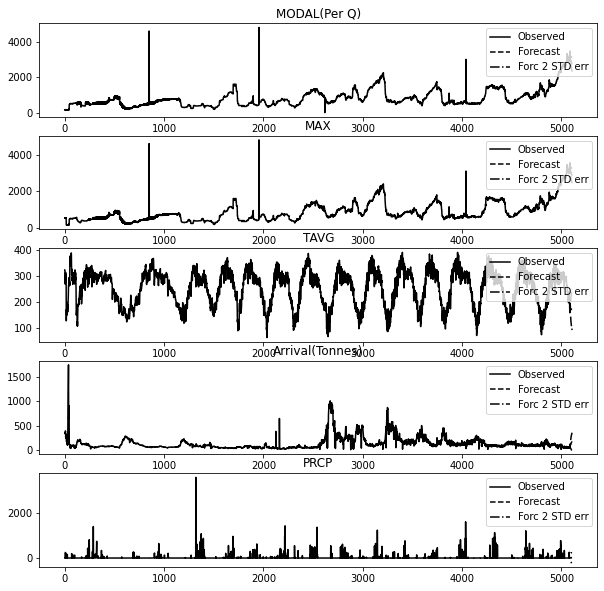

In [ ]:
results.plot_forecast(15)

In [ ]:
df_test['MODAL(Per Q)'][-10:]

date_arrival
2022-08-06    1650
2022-08-07    1650
2022-08-08    1650
2022-08-09    1650
2022-08-10    1660
2022-08-12    1670
2022-08-13    1660
2022-08-14    1660
2022-08-16    1660
2022-08-17    1690
Name: MODAL(Per Q), dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 400x320 with 0 Axes>

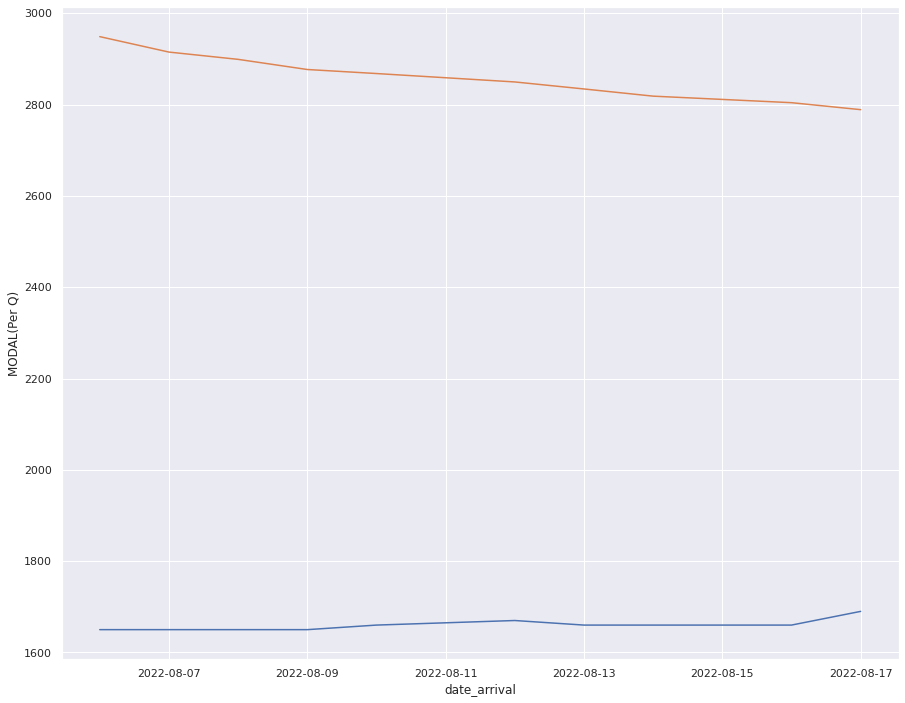

<Figure size 400x320 with 0 Axes>

In [ ]:
import seaborn as sns
sns.lineplot(df_test[-10:].index, df_test['MODAL(Per Q)'][-10:])
sns.lineplot(df_test[-10:].index,  pred['prediction'])
from matplotlib.pyplot import figure

figure(figsize=(5, 4), dpi=80)

In [ ]:
# rmse,mape,r2,accuracy

import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,median_absolute_error,explained_variance_score
mpe = mean_absolute_percentage_error(df_test['MODAL(Per Q)'][-10:] , pred['prediction'])
rmse = math.sqrt(mean_squared_error(df_test['MODAL(Per Q)'][-10:] , pred['prediction']))
mae = median_absolute_error(df_test['MODAL(Per Q)'][-10:] , pred['prediction'])
evs =explained_variance_score(df_test['MODAL(Per Q)'][-10:] , pred['prediction'])

print('The MPE is {}'.format(mpe))

print('The RSME is {}'.format(rmse))
print('The MAE is {}'.format(mae))
print('The EVS is {}'.format(evs))



## checking r2

from sklearn.metrics import r2_score
r2_score = r2_score(df_test['MODAL(Per Q)'][-10:] , pred['prediction'])
print('The r2 score is {}' .format(r2_score) )

The MPE is 0.7232491373744384
The RSME is 1201.5838569993998
The MAE is 1193.6831423876456
The EVS is -22.80554888808591
The r2 score is -10311.884038582528


## VARMAX

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
varmax_model = VARMAX(df_train,order=(4,0),enforce_stationarity=True)
fit_model = varmax_model.fit(disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
print(fit_model.summary())

                                               Statespace Model Results                                               
Dep. Variable:     ['MODAL(Per Q)', 'MAX', 'TAVG', 'Arrival(Tonnes)', 'PRCP']   No. Observations:                 5094
Model:                                                                 VAR(4)   Log Likelihood             -133146.578
                                                                  + intercept   AIC                         266533.156
Date:                                                        Thu, 15 Sep 2022   BIC                         267317.454
Time:                                                                07:10:50   HQIC                        266807.781
Sample:                                                                     0                                         
                                                                       - 5094                                         
Covariance Type:                                

In [ ]:
n_forecasts = 30
predict=fit_model.get_prediction(start=len(df_train), end=len(df_train) + n_forecasts - 1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
predictions = predict.predicted_mean
predictions.columns=['MODAL_pred', 'MAX_pred', 'TAVG_pred', 'Arrival_pred', 'PRCP_pred']
predictions

,MODAL_pred,MAX_pred,TAVG_pred,Arrival_pred,PRCP_pred
5094,2952.215852,3056.306967,172.435612,122.702138,14.467102
5095,2919.108144,3024.972330,172.082040,126.254517,13.557570
5096,2904.195422,3011.353104,171.546592,130.580856,16.608032
5097,2882.691768,2991.288854,171.620190,134.995776,17.065616
5098,2875.196541,2985.560162,171.431054,139.297716,17.999931
5099,2857.520351,2969.432564,171.295133,143.353567,18.334183
5100,2842.979832,2956.274196,171.157739,147.379522,18.603472
5101,2827.892617,2942.534856,171.077005,151.265178,18.709410
5102,2814.311403,2930.285751,170.955583,155.075962,18.736675
5103,2799.597543,2916.846440,170.847497,158.777957,18.764163


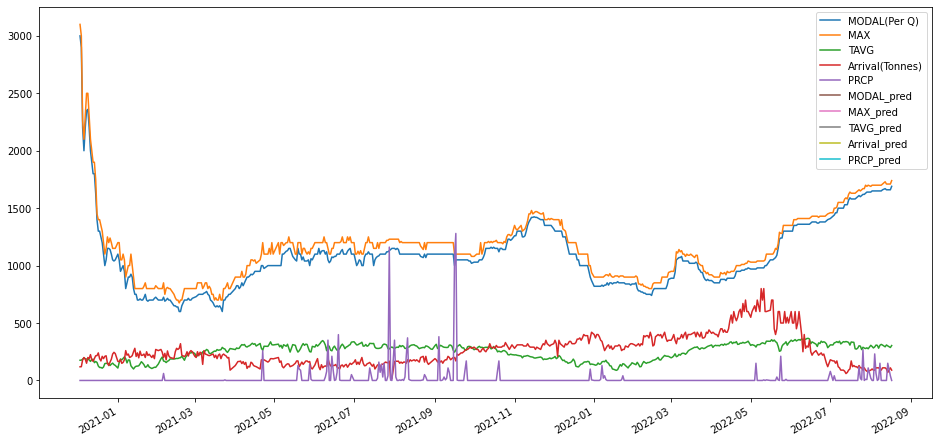

In [ ]:
test_vs_prediction =pd.concat([df_test, predictions],axis=1)
test_vs_prediction.plot(figsize=(16,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



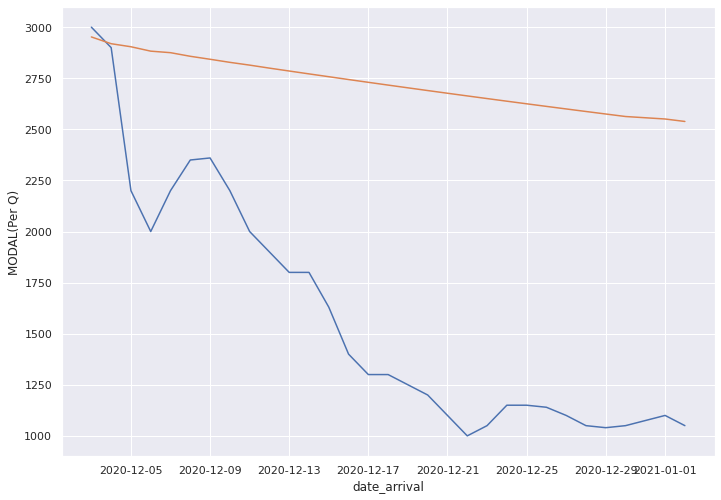

In [ ]:
import seaborn as sns
sns.lineplot(df_test[0:30].index, df_test['MODAL(Per Q)'][0:30])
sns.lineplot(df_test[0:30].index, predictions['MODAL_pred'])
import seaborn as sns

sns.set(rc={'figure.figsize':(15,12)})

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
from statistics import mean


In [ ]:
df_test.columns

Index(['MODAL(Per Q)', 'MAX', 'TAVG', 'Arrival(Tonnes)', 'PRCP'], dtype='object')

In [ ]:
# rmse,mape,r2,accuracy

import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,median_absolute_error,explained_variance_score
mpe = mean_absolute_percentage_error(df_test['MODAL(Per Q)'][0:30] , predictions['MODAL_pred'])
rmse = math.sqrt(mean_squared_error(df_test['MODAL(Per Q)'][0:30] , predictions['MODAL_pred']))
mae = median_absolute_error(df_test['MODAL(Per Q)'][0:30] , predictions['MODAL_pred'])
evs =explained_variance_score(df_test['MODAL(Per Q)'][0:30] , predictions['MODAL_pred'])

print('The MPE is {}'.format(mpe))

print('The RSME is {}'.format(rmse))
print('The MAE is {}'.format(mae))
print('The EVS is {}'.format(evs))



## checking r2

from sklearn.metrics import r2_score
r2_score = r2_score(df_test['MODAL(Per Q)'][0:30] , predictions['MODAL_pred'])
print('The r2 score is {}' .format(r2_score) )

The MPE is 0.8993527075209056
The RSME is 1230.4219694631483
The MAE is 1423.3651703786736
The EVS is 0.33808423697122336
The r2 score is -3.4915378908419292
